# Demostrating Epistasis Models 

In [1]:
import numpy as np
from epistasis.core.utils import generate_binary_space

Build a toy binary genotype-phenotype map, between two sequences, for the following example. The errors around each phenotype is 5%.

In [2]:
seq1 = 'AAAAA'
seq2 = 'VVVVV'
genotypes = generate_binary_space(seq1,seq2)
phenotypes = np.random.rand(len(genotypes))
errors = phenotypes*0.05

## The LocalEpistasisMap object

In [3]:
from epistasis.models import LocalEpistasisMap

The `LocalEpistasisMap` object can be used to estimate epistasis in a genotype-phenotype map using the biochemical interpretation (through mutant cycles) described in this paper to the order of **highest possible interaction**.

Begin by creating an instance of the `LocalEpistasisMap` and populating it with a wildtype (reference), genotypes, phenotypes, and phenotype errors. 

In [4]:
epistasis = LocalEpistasisMap(seq1, genotypes, phenotypes, phenotype_errors=errors, log_phenotypes=True)

The epistasis hasn't been estimated yet; the map has just been created. The following method estimates all interactions epistasis.

In [5]:
epistasis.estimate_interactions()
print epistasis.interaction_values
print epistasis.genotype2value

[-1.96748344  1.12254241  1.44831531  1.58022312  0.78695974  1.82865026
 -1.14316251 -1.59995034 -1.16073126 -1.03297933 -2.51384415 -1.14982293
 -1.40491612 -0.42939878 -2.76909088 -1.42534392  2.06225026 -0.6070005
  0.81952337  0.10265711  2.67946779  0.97364178  2.09031766  2.35421618
 -1.77239903  0.74241497  0.50285258 -1.53434054  4.32655821  0.43576934
  1.92251165 -6.65724567]
OrderedDict([('A0V', -1.9674834395467893), ('A1V', 1.1225424057518947), ('A2V', 1.4483153087754026), ('A3V', 1.5802231195573104), ('A4V', 0.78695973637843819), ('A5V', 1.8286502588452247), ('A1V,A2V', -1.1431625122056728), ('A1V,A3V', -1.5999503410716809), ('A1V,A4V', -1.1607312557985314), ('A1V,A5V', -1.0329793272589936), ('A2V,A3V', -2.5138441539045688), ('A2V,A4V', -1.1498229256012935), ('A2V,A5V', -1.4049161244009187), ('A3V,A4V', -0.42939878234463302), ('A3V,A5V', -2.7690908767173799), ('A4V,A5V', -1.4253439181312153), ('A1V,A2V,A3V', 2.0622502579837985), ('A1V,A2V,A4V', -0.60700049703279391), ('A1

In [6]:
epistasis.estimate_error()
print epistasis.interaction_errors
print epistasis.genotype2error

[ 0.00699041  0.01498474  0.03465801  0.04494651  0.02402369  0.05086658
  0.04322832  0.07626067  0.01687215  0.02443642  0.03792953  0.05695439
  0.03523222  0.07284098  0.05141773  0.09964214  0.04407652  0.064684
  0.0630885   0.09319422  0.05062268  0.08415483  0.07193032  0.12498541
  0.06733773  0.0844447   0.0940152   0.12279809  0.07774322  0.11856938
  0.10508865  0.16357329]
OrderedDict([('A0V', 0.006990412489523418), ('A1V', 0.014984737206077707), ('A2V', 0.034658008584694353), ('A3V', 0.044946510796105239), ('A4V', 0.02402369367913991), ('A5V', 0.050866584150276145), ('A1V,A2V', 0.043228321821801939), ('A1V,A3V', 0.076260666211295944), ('A1V,A4V', 0.01687214608014765), ('A1V,A5V', 0.024436420316763501), ('A2V,A3V', 0.037929534318196359), ('A2V,A4V', 0.056954386557924862), ('A2V,A5V', 0.035232224141715091), ('A3V,A4V', 0.072840977736529255), ('A3V,A5V', 0.051417730154241129), ('A4V,A5V', 0.099642135093202328), ('A1V,A2V,A3V', 0.044076520785634302), ('A1V,A2V,A4V', 0.0646840

## Plotting epistasis 

The `epistasis` package has build-in matplotlib plotting functions. This demostrates one of the methods.

In [12]:
%matplotlib inline
from epistasis.visuals.plotting import epistasis_bar

(<matplotlib.figure.Figure at 0x114fb6a90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x111e8a810>)

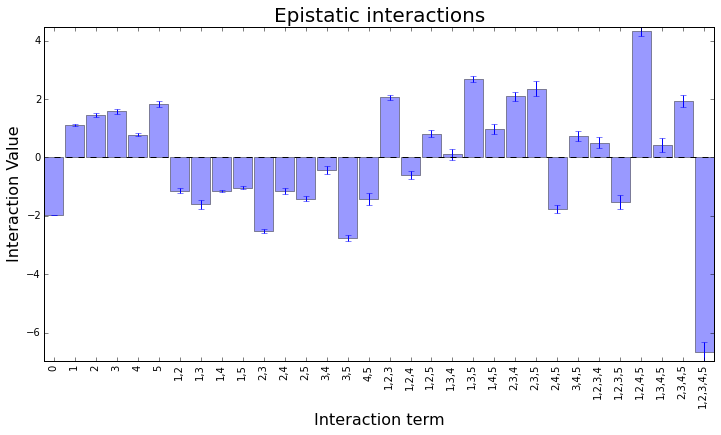

In [13]:
epistasis_bar(epistasis, sigmas=2)